In [4]:
import pandas as pd
data = pd.read_csv('Churn_Modelling.csv')

In [5]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [7]:
data.shape

(10000, 14)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [9]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [10]:
data.describe(include='all')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


### Dropping Irrelevant Features

In [11]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [12]:
data=data.drop(['RowNumber','CustomerId','Surname'],axis=1)

In [13]:
data.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

### Encoding Categorical Data

In [14]:
data = pd.get_dummies(data,drop_first=True)

In [15]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


### Not Handling Imbalanced

In [16]:
data['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [17]:
import seaborn as sns

<Axes: xlabel='Exited', ylabel='count'>

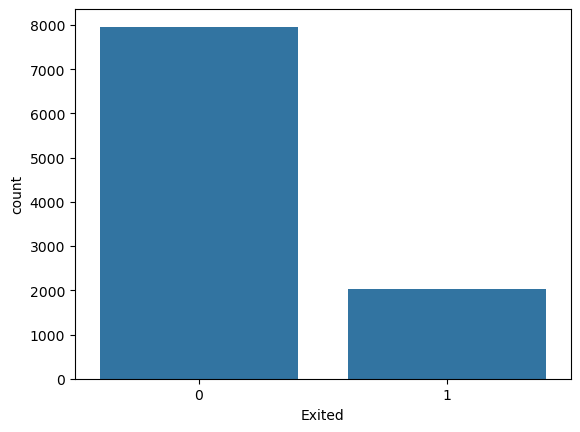

In [18]:
sns.countplot(x='Exited', data=data)

In [19]:
X = data.drop('Exited',axis=1)
y=data['Exited']

### Handling Imbalanced Data With SMOTE

In [20]:
from imblearn.over_sampling import SMOTE
X_res,y_res=SMOTE().fit_resample(X,y)

In [21]:
y_res.value_counts()

Exited
1    7963
0    7963
Name: count, dtype: int64

### Train/Test Split

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_res,y_res,test_size=0.2, random_state=34)

### Feature Scaling

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
sc=StandardScaler()

In [25]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
log = LogisticRegression()

In [28]:
log.fit(X_train,y_train)

LogisticRegression()

In [29]:
y_pred1= log.predict(X_test)

In [30]:
from sklearn.metrics import accuracy_score

In [31]:
accuracy_score(y_test,y_pred1)

0.7743251726302574

In [32]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [33]:
precision_score(y_test,y_pred1)

0.7748466257668711

In [34]:
recall_score(y_test,y_pred1)

0.7820433436532508

In [35]:
f1_score(y_test,y_pred1)

0.7784283513097072

### Support Vector Classifier

In [36]:
from sklearn import svm

In [37]:
svm = svm.SVC()

In [39]:
svm.fit(X_train,y_train)

SVC()

In [40]:
y_pred2=svm.predict(X_test)

In [41]:
accuracy_score(y_test,y_pred2)

0.8311362209667295

In [42]:
precision_score(y_test,y_pred2)

0.8445297504798465

### KNeighbors Classifier

In [43]:
from sklearn.neighbors import KNeighborsClassifier

In [44]:
knn = KNeighborsClassifier()

In [45]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [46]:
y_pred3 = knn.predict(X_test)

In [48]:
accuracy_score(y_test,y_pred3)

0.8113622096672944

In [49]:
precision_score(y_test,y_pred3)

0.8087697929354446

### Decision Tree Classifier

In [50]:
from sklearn.tree import DecisionTreeClassifier

In [51]:
dt = DecisionTreeClassifier()

In [52]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [55]:
y_pred4 = dt.predict(X_test)

In [56]:
accuracy_score(y_test,y_pred4)

0.812617702448211

In [57]:
precision_score(y_test,y_pred4)

0.8055222088835534

### Random Forest Classifier

In [58]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
rf = RandomForestClassifier()

In [60]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [61]:
y_pred5 = rf.predict(X_test)

In [62]:
accuracy_score(y_test,y_pred5)

0.8565599497802887

In [63]:
precision_score(y_test,y_pred5)

0.863237139272271

### Gradient Boosting Classifier

In [64]:
from sklearn.ensemble import GradientBoostingClassifier

In [65]:
gbc = GradientBoostingClassifier()

In [67]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [68]:
y_pred6 = gbc.predict(X_test)

In [69]:
accuracy_score(y_test,y_pred6)

0.8339610797237916

In [70]:
precision_score(y_test,y_pred6)

0.843236409608091

### Final Comparison

In [72]:
final_data = pd.DataFrame({'Models':['LR','SVC','KNN','DT','RF','GBC'],'ACC':[accuracy_score(y_test,y_pred1),
                                                                             accuracy_score(y_test,y_pred2),
                                                                             accuracy_score(y_test,y_pred3),
                                                                             accuracy_score(y_test,y_pred4),
                                                                             accuracy_score(y_test,y_pred5),
                                                                             accuracy_score(y_test,y_pred6)]})

In [73]:
final_data

,Models,ACC
0,LR,0.774325
1,SVC,0.831136
2,KNN,0.811362
3,DT,0.812618
4,RF,0.856560
5,GBC,0.833961


In [74]:
import seaborn as sns

<Axes: xlabel='Models', ylabel='ACC'>

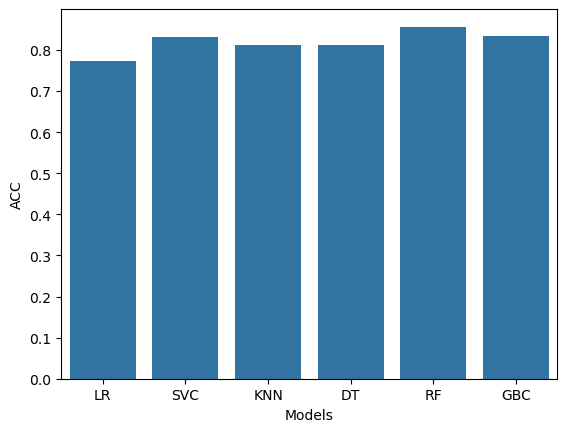

In [78]:
sns.barplot(x=final_data['Models'],y=final_data['ACC'])

In [79]:
final_data = pd.DataFrame({'Models':['LR','SVC','KNN','DT','RF','GBC'],'PRE':[precision_score(y_test,y_pred1),
                                                                             precision_score(y_test,y_pred2),
                                                                             precision_score(y_test,y_pred3),
                                                                             precision_score(y_test,y_pred4),
                                                                             precision_score(y_test,y_pred5),
                                                                             precision_score(y_test,y_pred6)]})

In [80]:
final_data

,Models,PRE
0,LR,0.774847
1,SVC,0.844530
2,KNN,0.808770
3,DT,0.805522
4,RF,0.863237
5,GBC,0.843236


<Axes: xlabel='Models', ylabel='PRE'>

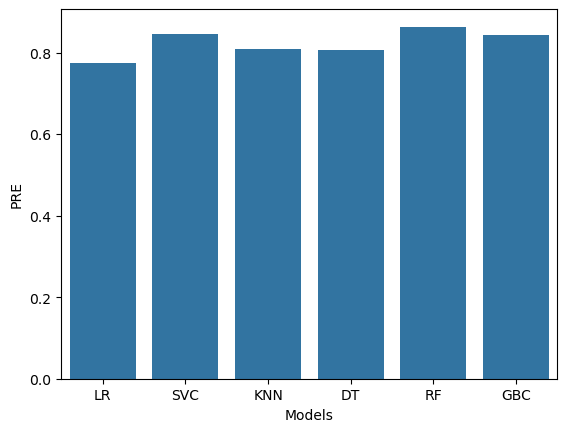

In [81]:
sns.barplot(x=final_data['Models'],y=final_data['PRE'])

### Saving The Model

In [82]:
X_res = sc.fit_transform(X_res)

In [83]:
rf.fit(X_res,y_res)

RandomForestClassifier()

In [84]:
import joblib 

In [85]:
joblib.dump(rf,'churn_predict_model')

['churn_predict_model']

In [86]:
model = joblib.load('churn_predict_model')

In [88]:
model.predict([[619,42,2,0.0,0,0,0,101348.88,0,0,0]])

array([1], dtype=int64)